<a href="https://colab.research.google.com/github/Donaldwic/Quant/blob/main/Visualize_MK_sharpe_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-9879534c7f43>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_data['Year'] = mk_data.index.year


<Figure size 1000x600 with 0 Axes>

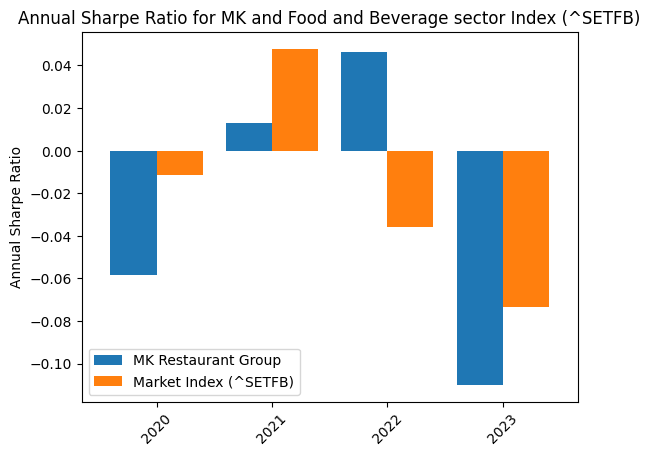

In [ ]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbols for MK Restaurant Group and the market index
ticker_symbol = "M.BK"  # 'M.BK' is the ticker symbol for MK Restaurant Group on the Bangkok Stock Exchange
market_symbol = "^SETFB" # Food and Beverage sector

# Download historical data
mk_data = yf.download(ticker_symbol, start="2020-01-01", end="2023-12-31")
index_data = yf.download(market_symbol, start="2020-01-01", end="2023-12-31")

# Calculate daily log-returns
mk_data['Log Return'] = np.log(mk_data['Adj Close'] / mk_data['Adj Close'].shift(1))
index_data['Log Return'] = np.log(index_data['Adj Close'] / index_data['Adj Close'].shift(1))

# Drop the first row with NaN values after calculating log-returns
mk_data = mk_data.dropna()
index_data = index_data.dropna()

# Add a 'Year' column to each dataset
mk_data['Year'] = mk_data.index.year
index_data['Year'] = index_data.index.year

# Assume an annual risk-free rate of 2%
annual_risk_free_rate = 0.02
daily_risk_free_rate = annual_risk_free_rate / 252

# Define a function to calculate the Sharpe Ratio for each year
def calculate_annual_sharpe_ratio(data):
    annual_sharpe_ratios = {}
    for year, group in data.groupby('Year'):
        avg_daily_return = group['Log Return'].mean()
        std_dev = group['Log Return'].std()
        sharpe_ratio = (avg_daily_return - daily_risk_free_rate) / std_dev
        annual_sharpe_ratios[year] = sharpe_ratio
    return annual_sharpe_ratios

# Calculate annual Sharpe Ratios for MK Restaurant Group and the market index
sharpe_ratios_mk = calculate_annual_sharpe_ratio(mk_data)
sharpe_ratios_index = calculate_annual_sharpe_ratio(index_data)

# Convert the Sharpe Ratios dictionaries to DataFrames for easy plotting
sharpe_df = pd.DataFrame({
    'MK Restaurant Group': sharpe_ratios_mk,
    'Market Index (^SETFB)': sharpe_ratios_index
})

# Plot the annual Sharpe Ratios
plt.figure(figsize=(10, 6))
sharpe_df.plot(kind='bar', width=0.8)
plt.ylabel('Annual Sharpe Ratio')
plt.title('Annual Sharpe Ratio for MK and Food and Beverage sector Index (^SETFB)')
plt.xticks(rotation=45)
plt.show()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price                      Adj Close  Close   High    Low   Open  Volume
Ticker                          M.BK   M.BK   M.BK   M.BK   M.BK    M.BK
Date                                                                    
2020-01-02 00:00:00+00:00  60.365242  69.75  70.50  69.25  70.50  445200
2020-01-03 00:00:00+00:00  60.148861  69.50  70.00  69.25  70.00  353600
2020-01-06 00:00:00+00:00  59.499779  68.75  69.50  68.25  69.50  187500
2020-01-07 00:00:00+00:00  59.499779  68.75  69.25  68.00  68.25  184500
2020-01-08 00:00:00+00:00  59.499779  68.75  69.00  67.75  68.50  285800
Price                         Adj Close         Close          High  \
Ticker                           ^SETFB        ^SETFB        ^SETFB   
Date                                                                  
2020-01-02 00:00:00+00:00  12363.669922  12363.669922  12454.769531   
2020-01-03 00:00:00+00:00  12458.459961  12458.459961  12527.389648   
2020-01-06 00:00:00+00:00  12175.730469  12175.730469  12369.

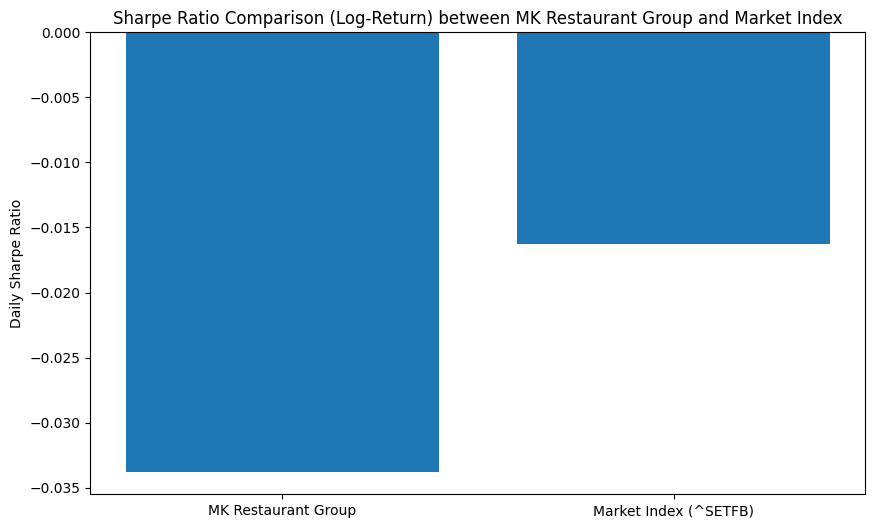

In [ ]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbols for MK Restaurant Group and the market index
ticker_symbol = "M.BK"  # 'M.BK' is the ticker symbol for MK Restaurant Group on the Bangkok Stock Exchange
market_symbol = "^SETFB"

# Download historical data
mk_data = yf.download(ticker_symbol, start="2020-01-01", end="2023-12-31")
index_data = yf.download(market_symbol, start="2020-01-01", end="2023-12-31")

# Display the first few rows of the data
print(mk_data.head())
print(index_data.head())

# Calculate daily log-returns
mk_data['Log Return'] = np.log(mk_data['Adj Close'] / mk_data['Adj Close'].shift(1))
index_data['Log Return'] = np.log(index_data['Adj Close'] / index_data['Adj Close'].shift(1))

# Drop the first row with NaN values after calculating log-returns
mk_data = mk_data.dropna()
index_data = index_data.dropna()

# Calculate the standard deviation of log-returns
std_dev_mk = mk_data['Log Return'].std()
std_dev_index = index_data['Log Return'].std()

# Calculate the variance of log-returns
variance_mk = mk_data['Log Return'].var()
variance_index = index_data['Log Return'].var()

print(f"MK Standard Deviation: {std_dev_mk}")
print(f"MK Variance: {variance_mk}")
print(f"Index Standard Deviation: {std_dev_index}")
print(f"Index Variance: {variance_index}")

# Calculate average daily log-return
avg_daily_return_mk = mk_data['Log Return'].mean()
avg_daily_return_index = index_data['Log Return'].mean()

# Assume an annual risk-free rate of 2%
annual_risk_free_rate = 0.02
daily_risk_free_rate = annual_risk_free_rate / 252

# Calculate daily Sharpe ratios
sharpe_ratio_mk = (avg_daily_return_mk - daily_risk_free_rate) / std_dev_mk
sharpe_ratio_index = (avg_daily_return_index - daily_risk_free_rate) / std_dev_index

print(f"MK Sharpe Ratio: {sharpe_ratio_mk}")
print(f"Index Sharpe Ratio: {sharpe_ratio_index}")

# Visualization of Sharpe Ratios
labels = ['MK Restaurant Group', 'Market Index (^SETFB)']
sharpe_ratios = [sharpe_ratio_mk, sharpe_ratio_index]

plt.figure(figsize=(10, 6))
plt.bar(labels, sharpe_ratios)
plt.ylabel('Daily Sharpe Ratio')
plt.title('Sharpe Ratio Comparison (Log-Return) between MK Restaurant Group and Market Index')
plt.show()